### Ejemplo 1: Datos Básicos y Visualización.

Situación: Eres un analista en una empresa de transporte y quieres entender la relación entre las horas de trabajo de los conductores y el número de viajes realizados.

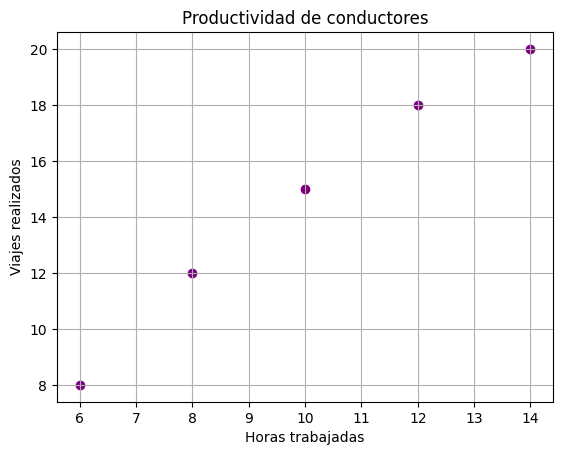

In [2]:
import matplotlib.pyplot as plt

# Datos: Horas trabajadas vs. Viajes realizados
horas = [6, 8, 10, 12, 14]
viajes = [8, 12, 15, 18, 20]

# Grafico de dispersión.
plt.scatter(horas, viajes, color = 'purple')
plt.title("Productividad de conductores")
plt.xlabel("Horas trabajadas")
plt.ylabel("Viajes realizados")
plt.grid(True)

plt.show()

### Ejercicio 1

Situación: En una clínica, se registraron las horas de sueño de pacientes y su nivel de estrés (1-10).

horas_sueño = [5, 6, 7, 8, 9]  
nivel_estrés = [8, 6, 5, 4, 3]  

1. Crea un gráfico de dispersión con estos datos.
2. ¿Qué relación observas?¿Es lineal o inversa?
3. Intenta predecir el estrés para alguien que duerme 7.5 horas (sin modelos, solo viendo el gráfico)

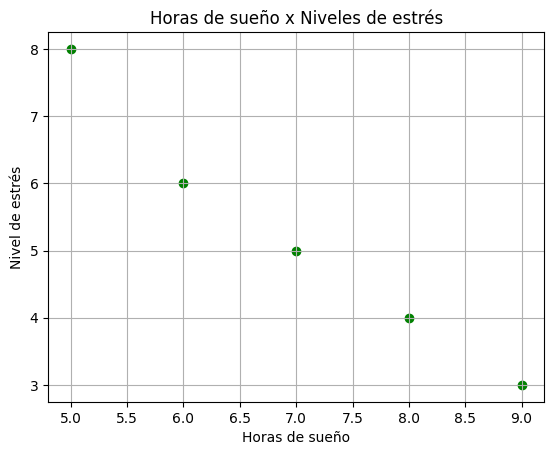

In [4]:
import matplotlib.pyplot as plt

# Horas de sueño y niveles de estrés.
horas_sueño = [5, 6, 7, 8, 9]
nivel_estres = [8, 6, 5, 4, 3]

# Gráfico.
plt.scatter(horas_sueño, nivel_estres, color = 'green')
plt.title("Horas de sueño x Niveles de estrés")
plt.xlabel("Horas de sueño")
plt.ylabel("Nivel de estrés")
plt.grid(True)

plt.show()

---

### Ejemplo 2: Normalización de Datos.

Situación: Tienes datos de ingresos (en miles de USD) y edad de clientes, pero las escalas son muy diferentes.

ingresos = [45, 60, 30, 80]  # En miles  
edad = [25, 40, 30, 50]      # En años  

Problema: Si usamos estos datos directamente, el modelo le dará más peso a los ingresos (por ser números más grandes).

Solución: Normalizar con **MinMaxScaler** de sklearn:

In [1]:
from sklearn.preprocessing import MinMaxScaler

datos = [[45, 25], [60, 40], [30, 30], [80, 50]]
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos)

print(datos_normalizados)

[[0.3 0. ]
 [0.6 0.6]
 [0.  0.2]
 [1.  1. ]]


### Ejercicio 2

Situación: Tienes datos de peso (kg) y altura (cm) de personas:

peso = [70, 55, 90, 60]  
altura = [165, 160, 185, 170]  

1. Normalizar estos datos con **MinMaxScaler**
2. Explica por qué es importante normalizar en este caso.

In [3]:
from sklearn.preprocessing import MinMaxScaler

datos = [[70, 165], [55, 160], [90, 185], [60, 170]]
scaler = MinMaxScaler()
datos_normalizado = scaler.fit_transform(datos)

print(datos_normalizados)

[[0.3 0. ]
 [0.6 0.6]
 [0.  0.2]
 [1.  1. ]]


---

### Ejemplo 3: Predecir ventas basadas en publicidad.

Situación: Quieres predecir cuántas unidades se venderán basado en el presupuesto de publicidad.

In [4]:
from sklearn.linear_model import LinearRegression

# Datos: Presupuesto (en miles) vs Ventas (unidades)
X = [[20], [30], [40], [50]] # Variable independiente.
y = [100, 150, 200, 250] # Variable dependiente.

# Crear y entrenar modelo.
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir para un presupuesto de 35 mil.
prediccion = modelo.predict([[35]])
print(f"Ventas estimadas: {prediccion[0]:.0f} unidades")

Ventas estimadas: 175 unidades


**X** es siempre una matriz 2D (aunque sea una sola característica).  
**y** es un vector 1D.

### Ejercicio 3

Situación: Un gimnasio quiere predecir las calorías quemadas basado en el tiempo de cinta (minutos).

tiempo = [10, 20, 30, 40]  
calorías = [150, 300, 450, 600]

1. Entrena un modelo de regresión lineal con estos datos.
2. Predice las calorías quemadas para 25 minutos.
3. ¿Cuál es el coeficiente (pendiente) de la recta? (usa modelo.coef_)

In [8]:
from sklearn.linear_model import LinearRegression

X = [[10], [20], [30], [40]]
y = [150, 300, 450, 600]

modelo = LinearRegression()
modelo.fit(X, y)

prediccion = modelo.predict([[25]])
print(f"Calorías quemadas: {prediccion[0]:.0f}")

modelo.coef_

Calorías quemadas: 375


array([15.])

---

###  Ejemplo 4: Diagnosticar diabetes (Si/No)

Situación: Tienes los datos de pacientes:

* glucosa (nivel de azúcar en sangre).
* edad.
* diabetes (0 = No, 1 = Sí).

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Datos ficticios.
data = {
    'glucosa': [120, 85, 200, 150, 90, 180],
    'edad': [45, 30, 60, 50, 35, 55],
    'diabetes': [1, 0, 1, 1, 0, 1]
}

In [2]:
df = pd.DataFrame(data)
df

,glucosa,edad,diabetes
0,120,45,1
1,85,30,0
2,200,60,1
3,150,50,1
4,90,35,0
5,180,55,1


In [3]:
# Separamos características (X) y target (y)
X = df[['glucosa', 'edad']]
y = df['diabetes']

# Entrenar el modelo.
modelo = LogisticRegression()
modelo.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [4]:
# Predecir para un nuevo paciente: glucosa = 130, edad = 40
nuevo_paciente = [[130, 40]]
prediccion = modelo.predict(nuevo_paciente)
print("¿Tiene diabetes?", "Si" if prediccion[0] == 1 else "No")

¿Tiene diabetes? Si


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [5]:
# Probabilidad de pertenecer a cada clase.
probabilidades = modelo.predict_proba(nuevo_paciente)
print(f"Probabilidades: No={probabilidades[0][0]:.2f}, Sí={probabilidades[0][1]:.2f}")

Probabilidades: No=0.00, Sí=1.00


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Ejercicio 4

Situación: Un banco quiere predecir si un cliente pagará un préstamo (0 = No pagará, 1 = Pagará).

In [ ]:
# Datos: saldo_en_cuenta (miles USD) vs historial_credito (años)
X = [[5, 2], [10, 5], [2, 1], [20, 8], [15, 7]]
y = [0, 1, 0, 1, 1]

1. Entrena un modelo de regresión logística.
2. Predice si un cliente con saldo = 8 e historial = 3 pagará.
3. Muenstra las probabilidades de cada clase.

Usa modelo.predict() y modelo.predict_proba()

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = {
    'saldo': [5, 10, 2, 20, 15],
    'historial': [2, 5, 1, 8, 7],
    'pago': [0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
df

,saldo,historial,pago
0,5,2,0
1,10,5,1
2,2,1,0
3,20,8,1
4,15,7,1


In [9]:
X = df[['saldo', 'historial']]
y = df['pago']

modelo = LogisticRegression()
modelo.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
nuevo_cliente = [[8, 3]]
prediccion = modelo.predict(nuevo_cliente)

print("El cliente", "Si" if prediccion[0] == 1 else "No", "pagará.")

El cliente Si pagará.


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
probabilidades = modelo.predict_proba(nuevo_cliente)
print(f"Probabilidades: No {probabilidades[0][0]:.2f}, Si {probabilidades[0][1]:.2f}")

Probabilidades: No 0.48, Si 0.52


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


---

### Ejemplo 5: Calcular precisión y matriz de confusión.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Dividir datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = modelo.predict(X_test)

# Precisión (accuracy)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

Precisión: 0.50
Matriz de confusión:
[[0 0]
 [1 1]]


### Ejercicio 5

Situación: Usa los datos del préstamo bancario del Ejercicio 4.

In [ ]:
# Datos: saldo_en_cuenta (miles USD) vs historial_credito (años)
X = [[5, 2], [10, 5], [2, 1], [20, 8], [15, 7]]
y = [0, 1, 0, 1, 1]

1. Divide los datos en 80% entrenamiento y 20% prueba.
2. Evaluala precisión del modelo.
3. Genera la matriz de confusión.

Pregunta clave: Si la matriz es [[1, 0], [1, 1]] ¿Cuántos falsos positivos hay?

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

datos = {
    'saldo': [5, 10, 2, 20, 15],
    'historial': [2, 5, 1, 8, 7],
    'pago': [0, 1, 0, 1, 1]
}

df = pd.DataFrame(datos)
df

,saldo,historial,pago
0,5,2,0
1,10,5,1
2,2,1,0
3,20,8,1
4,15,7,1


In [14]:
X = df[['saldo', 'historial']]
y = df['pago']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred = modelo.predict(X_test)

precision = accuracy_score(y_test, y_pred)
print(f"precision: {precision:.2f}")

precision: 1.00


In [19]:
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)

Matriz de confusión
[[1]]


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
